In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [327]:
train = pd.read_csv("./Downloads/titanic_train.csv")
test = pd.read_csv("./Downloads/titanic_test.csv")

In [328]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot: >

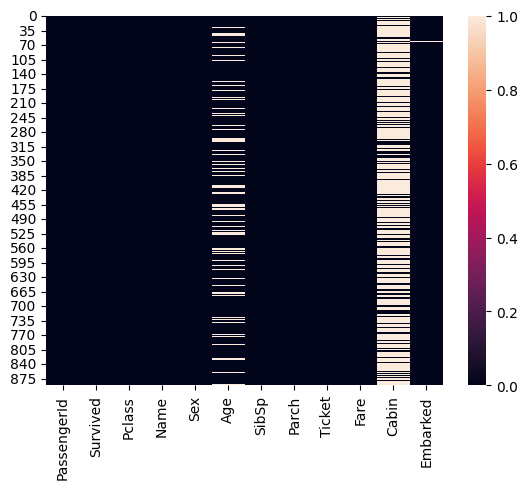

In [329]:
sns.heatmap(train.isnull(), cbar=True)

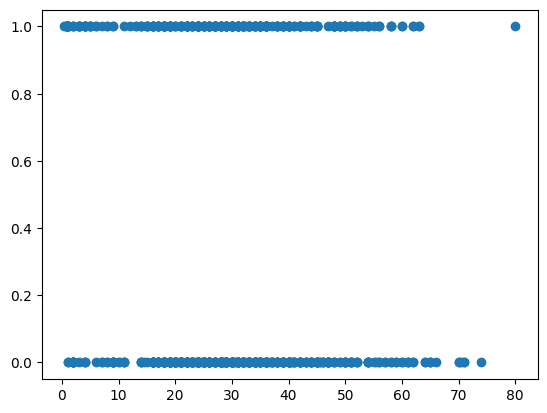

In [330]:
plt.scatter("Age","Survived",data=train)

In [331]:
train.drop("Cabin", axis=1,inplace=True)

<AxesSubplot: >

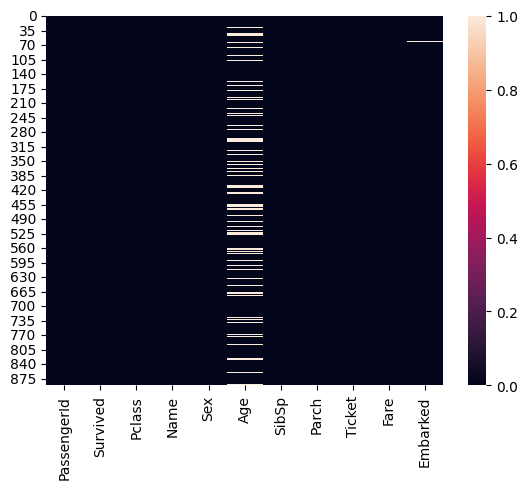

In [332]:
sns.heatmap(train.isnull(), cbar=True)

In [333]:
train['Age']=train['Age'].fillna(train['Age'].mode()[0])

<AxesSubplot: >

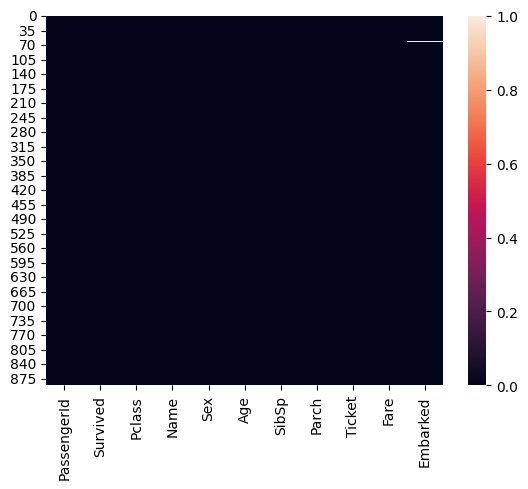

In [334]:
sns.heatmap(train.isnull(), cbar=True)

In [335]:
train.drop("Name", axis=1,inplace=True)

<AxesSubplot: >

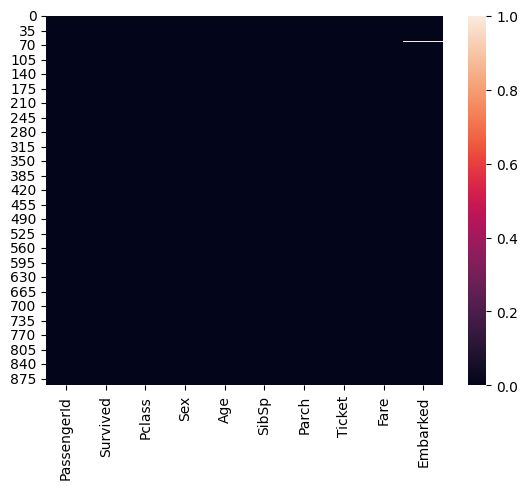

In [336]:
sns.heatmap(train.isnull(), cbar=True)

In [337]:
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [338]:
train['Embarked'].nunique()
#find number of unique values

3

In [339]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [340]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [341]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [342]:
train.drop("Ticket", axis=1,inplace=True)

In [343]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [344]:
train = pd.concat([train,sex,embark], axis=1)

In [345]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [346]:
train.drop(["Sex","Embarked","PassengerId"],axis=1,inplace=True)

In [347]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [348]:
x = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]

In [349]:
y = train['Survived']

In [350]:
from sklearn.preprocessing import StandardScaler

In [351]:
sc = StandardScaler()

In [352]:
X=sc.fit_transform(x)

In [353]:
from sklearn.model_selection import train_test_split

In [354]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=88)

In [355]:
ann=keras.models.Sequential([keras.layers.Dense(10,activation='relu'),keras.layers.Dense(10,activation='relu'),keras.layers.Dense(1,activation='sigmoid')])

In [356]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [357]:
history = ann.fit(X_train, y_train, epochs=15, batch_size=200)

Epoch 1/15
4/4 [==============================] - 2s 5ms/step - loss: 0.7815 - accuracy: 0.3975
Epoch 2/15
4/4 [==============================] - 0s 8ms/step - loss: 0.7637 - accuracy: 0.4860
Epoch 3/15
4/4 [==============================] - 0s 5ms/step - loss: 0.7488 - accuracy: 0.5449
Epoch 4/15
4/4 [==============================] - 0s 6ms/step - loss: 0.7343 - accuracy: 0.5646
Epoch 5/15
4/4 [==============================] - 0s 6ms/step - loss: 0.7217 - accuracy: 0.5829
Epoch 6/15
4/4 [==============================] - 0s 5ms/step - loss: 0.7106 - accuracy: 0.5801
Epoch 7/15
4/4 [==============================] - 0s 5ms/step - loss: 0.7005 - accuracy: 0.5730
Epoch 8/15
4/4 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5829
Epoch 9/15
4/4 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.5787
Epoch 10/15
4/4 [==============================] - 0s 5ms/step - loss: 0.6745 - accuracy: 0.5787
Epoch 11/15
4/4 [======================

In [358]:
test.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [359]:
test.drop(["Name", "Cabin", "Ticket"], axis=1,inplace=True)

In [360]:
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [361]:
test.drop(["PassengerId"], axis=1,inplace=True)

In [362]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [363]:
sex2 = pd.get_dummies(test["Sex"], drop_first=True)

In [364]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [365]:
test['Age']=test['Age'].fillna(test['Age'].mode()[0])

In [366]:
test['Fare']=test['Fare'].fillna(test['Fare'].mode()[0])

In [367]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [368]:
embark1 = pd.get_dummies(test["Embarked"], drop_first=True)

In [369]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [370]:
test = pd.concat([test,sex2,embark1], axis=1)

In [371]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,3,male,34.5,0,0,7.8292,Q,1,1,0
1,3,female,47.0,1,0,7.0000,S,0,0,1
2,2,male,62.0,0,0,9.6875,Q,1,1,0
3,3,male,27.0,0,0,8.6625,S,1,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,1


In [372]:
test.drop(["Sex","Embarked"], axis=1,inplace=True)

In [373]:
test.head(5)


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [374]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [376]:
test1 = sc.transform(test)

In [378]:
y_pred1 = ann.predict(test1)

14/14 [==============================] - 0s 3ms/step


In [379]:
y_pred1 = y_pred1 > 0.5

In [380]:
y_pred1

array([[ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [